In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def cosPolarization(particle):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    plt.figure()
    plt.plot(np.cos(fil[:,particle,2]))
    plt.xlabel("t")
    plt.ylabel(r"cos($\theta$)")
    plt.title(r"Cos($\theta$) particle "+str(particle))
    plt.savefig(f"Plots/cos(theta)Particle{particle}.svg")
    plt.savefig(f"Plots/cos(theta)Particle{particle}.pdf")
    plt.show()

def cosPolarization2(particle, fil):
    plt.figure()
    plt.plot(np.cos(fil[:,particle,2]))
    plt.xlabel("t")
    plt.ylabel(r"cos($\theta$)")
    plt.title(r"Cos($\theta$) particle "+str(particle))
    plt.savefig(f"Plots/cos(theta)Particle{particle}.svg")
    plt.savefig(f"Plots/cos(theta)Particle{particle}.pdf")
    plt.show()

def cosvcos(particle):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    plt.figure()
    plt.scatter(np.cos(fil[:-1,particle,2]), np.cos(fil[1:,particle,2]), cmap="rainbow", c=np.arange(len(fil[:-1, particle, 2])))
    plt.xlabel(r"cos($\theta(t)$)")
    plt.ylabel(r"cos($\theta(t+dt)$)")
    plt.title(r"cos($\theta(t)$) vs cos($\theta(t+dt)$) particle "+str(particle))
    plt.savefig(f"Plots/cos(t+dt)particle{particle}.svg")
    plt.savefig(f"Plots/cos(t+dt)particle{particle}.pdf")
    plt.show()

def cosvcos2(particle, fil):
    plt.figure()
    plt.scatter(np.cos(fil[:-1,particle,2]), np.cos(fil[1:,particle,2]), cmap="rainbow", c=np.arange(len(fil[:-1, particle, 2])))
    plt.xlabel(r"cos($\theta(t)$)")
    plt.ylabel(r"cos($\theta(t+dt)$)")
    plt.title(r"cos($\theta(t)$) vs cos($\theta(t+dt)$) particle "+str(particle))
    plt.savefig(f"Plots/cos(t+dt)particle{particle}.svg")
    plt.savefig(f"Plots/cos(t+dt)particle{particle}.pdf")
    plt.show()

def phi(particle, timestep=0):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    theta=np.mod(fil[timestep:,particle,2], 2*np.pi)
    angleForce=np.arctan2(filf[timestep:,particle,1], filf[timestep:,particle,0])#+np.pi*np.ones(samples-timestep)
    phi = np.mod(angleForce-theta, 2*np.pi)
    for i in range(len(phi)):
        if phi[i]>np.pi:
            phi[i]-=2*np.pi
    plt.figure()
    plt.plot(np.linspace(samples-timestep, samples, samples-timestep), phi)
    plt.xlabel(r"t")
    plt.ylabel(r"$\phi$")
    plt.title(r"$\phi$ particle "+str(particle))
    plt.savefig(f"Plots/phiParticle{particle}.svg")
    plt.savefig(f"Plots/phiParticle{particle}.pdf")
    plt.show()

def phi2(particle, fil, filf, timestep=0):
    theta=np.mod(fil[timestep:,particle,2], 2*np.pi)
    angleForce=np.arctan2(filf[timestep:,particle,1], filf[timestep:,particle,0])#+np.pi*np.ones(samples-timestep)
    phi = np.mod(angleForce-theta, 2*np.pi)
    for i in range(len(phi)):
        if phi[i]>np.pi:
            phi[i]-=2*np.pi
    plt.figure()
    plt.plot(np.linspace(len(fil)-timestep, len(fil), len(fil)-timestep), phi)
    plt.xlabel(r"t")
    plt.ylabel(r"$\phi$")
    plt.title(r"$\phi$ particle "+str(particle))
    plt.savefig(f"Plots/phiParticle{particle}.svg")
    plt.savefig(f"Plots/phiParticle{particle}.pdf")
    plt.show()

def phiDot(particle, timestep=0):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    theta=np.mod(fil[timestep:,particle,2], 2*np.pi)
    angleForce=np.arctan2(filf[timestep:,particle,1], filf[timestep:,particle,0])#+np.pi*np.ones(samples-timestep)
    phi = np.mod(angleForce-theta, 2*np.pi)
    for i in range(len(phi)):
        if phi[i]>np.pi:
            phi[i]-=2*np.pi
    # phidot = np.diff(phi)/(DT*3000)
    phidot = np.gradient(phi, DT*3000)
    plt.figure()
    plt.plot(np.linspace(samples-timestep, samples, samples-timestep), phidot)
    plt.xlabel(r"t")
    plt.ylabel(r"$\dot{\phi}$")
    plt.title(r"$\dot{\phi}$ particle "+str(particle))
    plt.savefig(f"Plots/phidotParticle{particle}.svg")
    plt.savefig(f"Plots/phidotParticle{particle}.pdf")
    plt.show()

def phiDot2(particle, fil, filf, DT, timestep=0):
    samples = len(fil)
    theta=np.mod(fil[timestep:,particle,2], 2*np.pi)
    angleForce=np.arctan2(filf[timestep:,particle,1], filf[timestep:,particle,0])#+np.pi*np.ones(samples-timestep)
    phi = np.mod(angleForce-theta, 2*np.pi)
    for i in range(len(phi)):
        if phi[i]>np.pi:
            phi[i]-=2*np.pi
    # phidot = np.diff(phi)/(DT*3000)
    phidot = np.gradient(phi, DT*3000)
    plt.figure()
    plt.plot(np.linspace(samples-timestep, samples, samples-timestep), phidot)
    plt.xlabel(r"t")
    plt.ylabel(r"$\dot{\phi}$")
    plt.title(r"$\dot{\phi}$ particle "+str(particle))
    plt.savefig(f"Plots/phidotParticle{particle}.svg")
    plt.savefig(f"Plots/phidotParticle{particle}.pdf")
    plt.show()

    
def plotPolarOrder():
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    p=np.zeros(samples)
    for i in range(samples):
        for j in range(NP):
            p[i]+=1*np.sin(np.arctan2(fil[i,j, 1], fil[i,j, 0])-fil[i,j, 2])

    plt.plot(np.abs(p/NP))
    plt.xlabel("Time")
    plt.ylabel("Polar order")
    plt.title("Polar order per time")
    plt.grid()
    plt.savefig(f"Plots/PolarOrder.svg")
    plt.savefig(f"Plots/PolarOrder.pdf")
    plt.show()

def plotPolarOrder2(fil):
    samples = len(fil)
    NP = len(fil[0])
    p=np.zeros(samples)
    for i in range(samples):
        for j in range(NP):
            p[i]+=1*np.sin(np.arctan2(fil[i,j, 1], fil[i,j, 0])-fil[i,j, 2])
    plt.plot(np.abs(p/NP))
    plt.xlabel("Time")
    plt.ylabel("Polar order")
    plt.title("Polar order per time")
    plt.grid()
    plt.savefig(f"Plots/PolarOrder.svg")
    plt.savefig(f"Plots/PolarOrder.pdf")
    plt.show()

def plotPolarizationOrder(fil):
    samples = len(fil)
    NP = len(fil[0])
    p=np.zeros((samples, 2))
    for i in range(samples):
        for j in range(NP):
            p[i]+=[np.cos(fil[i, j, 2]), np.sin(fil[i, j, 2])]
    for i in range(samples):
        p[i]= np.sqrt(p[i][0]**2+p[i][1]**2)
    plt.figure(figsize=(6,6))
    plt.plot(np.abs(p/NP))
    plt.xlabel("Time")
    plt.ylabel("Polarization order parameter")
    plt.title("Polarization order parameter")
    plt.grid()
    plt.savefig(f"Plots/PolarizationOrder.svg")
    plt.savefig(f"Plots/PolarizationOrder.pdf")
    plt.show()

def plotTraj(particle, fil, timestep=0):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    ax.scatter(fil[timestep:, particle, 0], fil[timestep:, particle, 1], cmap="rainbow", c=np.arange(len(fil[timestep:, particle, 1])))
    ax.quiver(fil[timestep::70,particle,0],fil[timestep::70,particle,1], np.cos(fil[timestep::70,particle, 2]), np.sin(fil[timestep::70,particle, 2]), scale=0.7, scale_units='x')
    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.title(f"Trajectory particle {particle}")
    plt.grid()
    plt.savefig(f"Plots/TrajectoryParticle{particle}.svg")
    plt.savefig(f"Plots/TrajectoryParticle{particle}.pdf")
    plt.show()

def plotTraj2(particle, fil, timestep=0):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    ax.scatter(fil[timestep:, particle, 0], fil[timestep:, particle, 1], cmap="rainbow", c=np.arange(len(fil[timestep:, particle, 1])))
    ax.quiver(fil[timestep::70,particle,0],fil[timestep::70,particle,1], np.cos(fil[timestep::70,particle, 2]), np.sin(fil[timestep::70,particle, 2]), scale=0.7, scale_units='x')
    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.title(f"Trajectory particle {particle}")
    plt.grid()
    plt.savefig(f"Plots/TrajectoryParticle{particle}.svg")
    plt.savefig(f"Plots/TrajectoryParticle{particle}.pdf")
    plt.show()

def plotMeanVelPerTime():
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    v=np.zeros(samples)
    # vy=np.zeros(samples)
    for i in range(samples):
        for j in range(NP):
            v[i]+=np.sqrt(filf[i,j, 0]**2+filf[i,j, 1]**2)
    plt.figure()
    plt.plot(v/NP)
    plt.xlabel("Time")
    plt.ylabel("Mean velocity")
    plt.title("Mean velocity per time")
    plt.grid()
    plt.savefig(f"Plots/meanVel.svg")
    plt.savefig(f"Plots/meanVel.pdf")
    plt.show()


def plotMeanVelPerTime2(filf):
    samples = len(filf)
    NP = len(filf[0])
    v=np.zeros(samples)
    # vy=np.zeros(samples)
    for i in range(samples):
        for j in range(NP):
            v[i]+=np.sqrt(filf[i,j, 0]**2+filf[i,j, 1]**2)
    plt.figure()
    plt.plot(v/NP)
    plt.xlabel("Time")
    plt.ylabel("Mean velocity")
    plt.title("Mean velocity per time")
    plt.grid()
    plt.savefig(f"Plots/meanVel.svg")
    plt.savefig(f"Plots/meanVel.pdf")
    plt.show()

def plotanglepertime(particle, fil):
    samples = len(fil)
    NP = len(fil[0])
    anglepart=np.arctan2(fil[:500,particle,1], fil[:500,particle,0])
    anglepart=np.mod(anglepart, 2*np.pi)
    n=0
    for i in range(len(anglepart)):
        if (i>0):
            if (anglepart[i-1]>(anglepart[i]+n*2*np.pi)):
                print(i)
                n+=1     
        anglepart[i]+=n*2*np.pi
    plt.figure()
    plt.plot(anglepart)
    plt.xlabel("Time")
    plt.ylabel("Angle")
    plt.title("Angle per time")
    plt.grid()
    plt.savefig(f"Plots/Angle.svg")
    plt.savefig(f"Plots/Angle.pdf")
    plt.show()

def plotMeanAngularVelPerTime(fil, filf, DT, timestep=0):
    samples = len(filf)
    NP = len(filf[0])
    w = np.zeros(samples)
    for i in range(NP):
        anglepart=np.arctan2(fil[:,i,1], fil[:,i,0])
        anglepart=np.mod(anglepart, 2*np.pi)
        n=0
        for j in range(len(anglepart)):
            if (j>0 and j<samples-1):
                if (anglepart[j-1]<2*np.pi+n*2*np.pi) and (anglepart[j-1]>=3*np.pi/2+n*2*np.pi) and (anglepart[j]>=0) and (anglepart[j]<=np.pi/2):
                    n+=1
                if (anglepart[j-1]<=np.pi/2+n*2*np.pi) and (anglepart[j-1]>=n*2*np.pi) and (anglepart[j]>=3*np.pi/2) and (anglepart[j]<2*np.pi):
                    n-=1
            anglepart[j]+=n*2*np.pi
        w += np.gradient(anglepart, 3000*DT)
    plt.figure()
    plt.plot(np.linspace(timestep, samples, len(w[timestep:])), w[timestep:]/NP)
    plt.xlabel("Time")
    plt.ylabel("Mean angular velocity")
    plt.title("Mean angular velocity per time")
    plt.grid()
    plt.savefig(f"Plots/meanAngularVel.svg")
    plt.savefig(f"Plots/meanAngularVel.pdf")
    plt.show()

def plotparticleAngularVel(particle, fil, filf, DT):
    samples = len(filf)
    NP = len(filf[0])
    anglepart=np.arctan2(fil[:,particle,1], fil[:,particle,0])
    anglepart=np.mod(anglepart, 2*np.pi)
    n=0
    for j in range(len(anglepart)):
        if (j>0):
            if (anglepart[j-1]<2*np.pi+n*2*np.pi) and (anglepart[j-1]>=3*np.pi/2+n*2*np.pi) and (anglepart[j]>=0) and (anglepart[j]<=np.pi/2):
                n+=1
            if (anglepart[j-1]<=np.pi/2+n*2*np.pi) and (anglepart[j-1]>=n*2*np.pi) and (anglepart[j]>=3*np.pi/2) and (anglepart[j]<2*np.pi):
                n-=1
        anglepart[j]+=n*2*np.pi
    w = np.gradient(anglepart, 3000*DT)
    plt.figure()
    plt.plot(w)
    plt.xlabel("Time")
    plt.ylabel("Angular velocity")
    plt.title(f"Angular velocity per time {particle}")
    plt.grid()
    plt.savefig(f"Plots/AngularVel{particle}.svg")
    plt.savefig(f"Plots/AngularVel{particle}.pdf")
    plt.show()


def plotGraps(particle, plotVelAndPol=False, timestep=800):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    plotTraj2(particle, fil)
    cosPolarization2(particle, fil)
    cosvcos2(particle, fil)
    phi2(particle, fil, filf, timestep)
    phiDot2(particle, fil, filf, DT, timestep)
    if plotVelAndPol:
        plotMeanVelPerTime2(filf)
        plotPolarOrder2(fil)

def plotGraps2(fil, filf, DT, particle, plotVelAndPol=False, timestep=800):
    plotTraj2(particle, fil)
    cosPolarization2(particle, fil)
    cosvcos2(particle, fil)
    phi2(particle, fil, filf, timestep)
    phiDot2(particle, fil, filf, DT, timestep)
    plotparticleAngularVel(particle, fil, filf, DT)
    if plotVelAndPol:
        plotMeanVelPerTime2(filf)
        plotPolarOrder2(fil)
    
    


def calcVarphi(timestep=0): #Bruker phidot mean over alle tidssteg og alle partikler
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    phidotmean = 0
    phidot2mean = 0
    for i in range(NP):
        theta=np.mod(fil[timestep:,i,2], 2*np.pi)
        angleForce=np.arctan2(filf[timestep:,i,1], filf[timestep:,i,0])#+np.pi*np.ones(samples-timestep)
        phi = np.mod(angleForce-theta, 2*np.pi)
        phidot = np.gradient(phi, DT*3000)
        phidotmean+=np.mean(phidot)
        phidot2mean+=np.dot(phidot, phidot)/len(phidot)
    return phidot2mean/NP-phidotmean**2/NP**2

def calcVarphi2(fil, filf, DT, timestep=0): #Bruker phidot mean over alle tidssteg og alle partikler
    NP=len(fil[0])
    phidotmean = 0
    phidot2mean = 0
    for i in range(NP):
        theta=np.mod(fil[timestep:,i,2], 2*np.pi)
        angleForce=np.arctan2(filf[timestep:,i,1], filf[timestep:,i,0])#+np.pi*np.ones(samples-timestep)
        phi = np.mod(angleForce-theta, 2*np.pi) #array of phi values per time step for particle i
        phidot = np.gradient(phi, DT*3000) #array of phidot values per time step for particle i
        phidotmean+=np.mean(phidot) #mean of phidot values for particle i
        phidot2mean+=np.dot(phidot, phidot)/len(phidot) #mean of phidot squared values for particle i
    return phidot2mean/NP-phidotmean**2/NP**2

def calcVarphiOnlyLastSample(fil, filf, DT, timestep=0): #Bruker phidot mean over alle tidssteg og alle partikler
    NP=len(fil[0])
    phivar=np.zeros(len(fil)-timestep)
    phidot = np.zeros(len(fil)-timestep)
    phidot2 = np.zeros(len(fil)-timestep)
    for i in range(NP):
        theta=np.mod(fil[timestep:,i,2], 2*np.pi)
        angleForce=np.arctan2(filf[timestep:,i,1], filf[timestep:,i,0])#+np.pi*np.ones(samples-timestep)
        phi = np.mod(angleForce-theta, 2*np.pi)
        phidot += np.gradient(phi, DT*3000)
        phidot2 += np.square(np.gradient(phi, DT*3000))
    phivar = phidot2/NP-np.square(phidot)/NP**2
    return phivar[-1]

def plotVarphipertime(fil, filf, DT, timestep=0):
    NP=len(fil[0])
    phivar=np.zeros(len(fil)-timestep)
    phidot = np.zeros(len(fil)-timestep)
    phidot2 = np.zeros(len(fil)-timestep)
    for i in range(NP):
        theta=np.mod(fil[timestep:,i,2], 2*np.pi)
        angleForce=np.arctan2(filf[timestep:,i,1], filf[timestep:,i,0])#+np.pi*np.ones(samples-timestep)
        phi = np.mod(angleForce-theta, 2*np.pi)
        phidot += np.gradient(phi, DT*3000)
        phidot2 += np.square(np.gradient(phi, DT*3000))

    phivar = phidot2/NP-np.square(phidot)/NP**2
    plt.figure()
    plt.plot(phivar)
    plt.xlabel("Time")
    plt.ylabel("Phi variance per time")
    plt.title("Phi variance per time")
    plt.savefig(f"Plots/Phivar.svg")
    plt.savefig(f"Plots/Phivar.pdf")
    plt.show()

def plotVelvsForce(fil, filf, particle, DT):
    NP=len(fil[0])
    samples = len(filf)
    theta = fil[:, particle, 2]
    # thetadot = np.zeros(samples)
    # for i in range(samples):
    #     thetadot[i] = 0

    costheta=np.cos(fil[:,particle,2])
    costhetadot = np.gradient(costheta, DT*2000)
    thetadot = np.gradient(theta, DT*2000)

    plt.figure()
    plt.plot(filf[::, particle, 0]/np.linalg.norm(filf[::, particle, 0]), label = r"$F_x$")
    plt.plot(filf[::, particle, 1]/np.linalg.norm(filf[::, particle, 1]), label = r"$F_y$")
    plt.plot(costhetadot/np.linalg.norm(costhetadot), label = r"$\dot{cos(\theta)}$")
    # plt.plot(thetadot/np.linalg.norm(thetadot), label = r"$\dot{\theta}$")
    plt.ylim(-0.1, 0.1)
    plt.xlabel("Time")
    plt.legend()
    plt.title(r"$\dot{cos(\theta)}$ in comparison to the particles forces"+f" particle {particle}")
    plt.savefig(f"Plots/thetadotF{particle}.svg")
    plt.savefig(f"Plots/thetadotF{particle}.pdf")
    plt.show()
    

In [3]:
plotVelvsForce(fil, filf, 100, DT)

NameError: name 'fil' is not defined

6.609289985718616
22.283085000870205


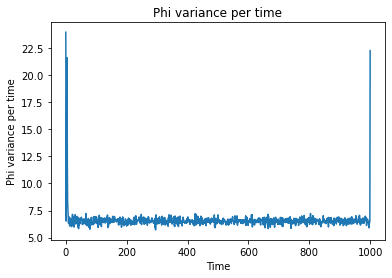

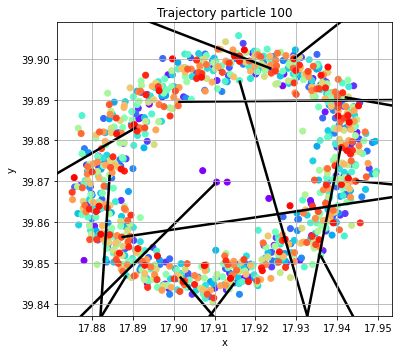

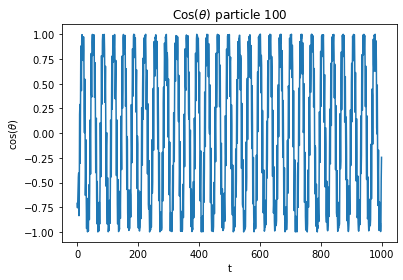

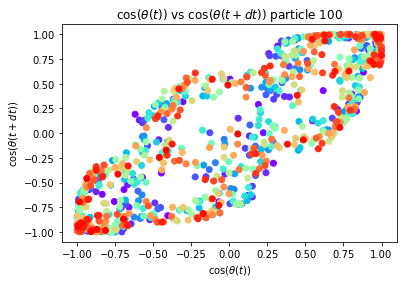

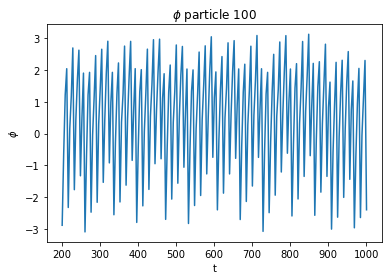

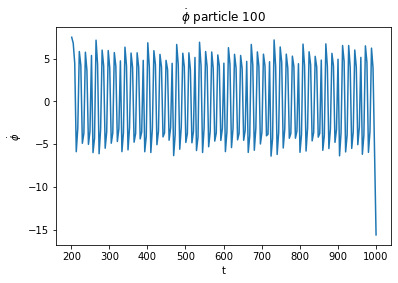

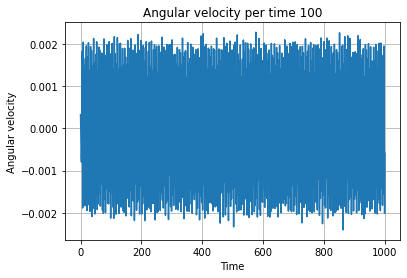

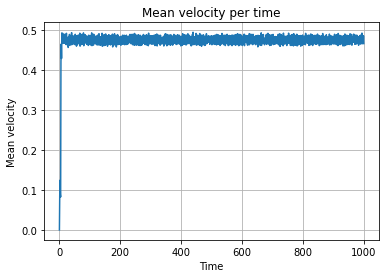

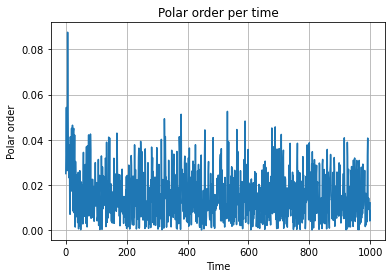

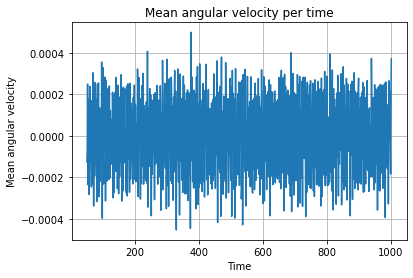

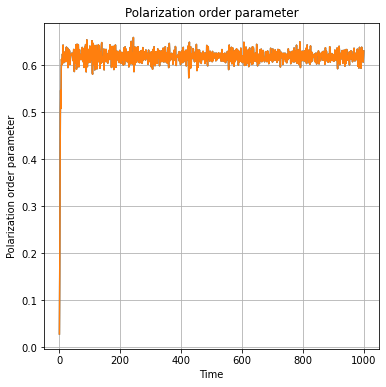

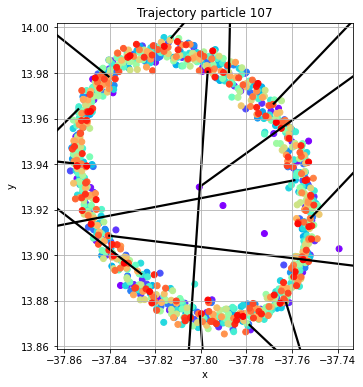

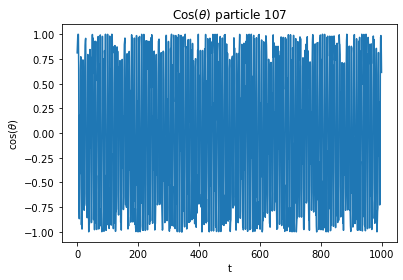

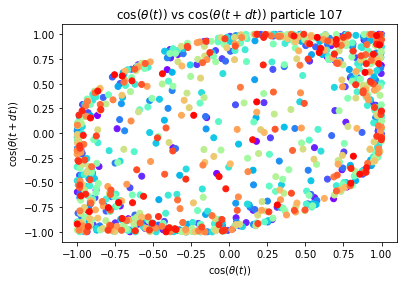

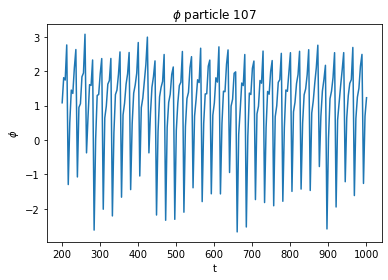

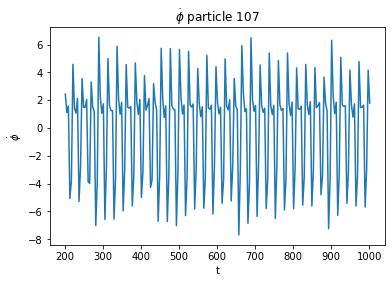

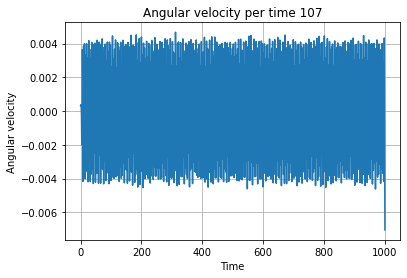

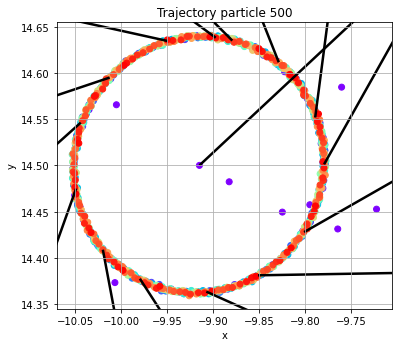

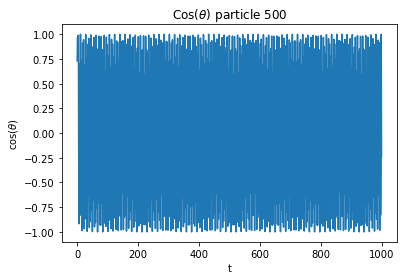

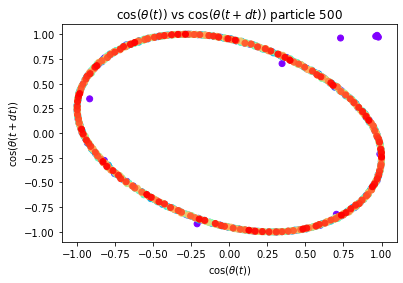

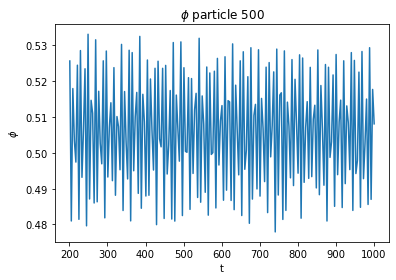

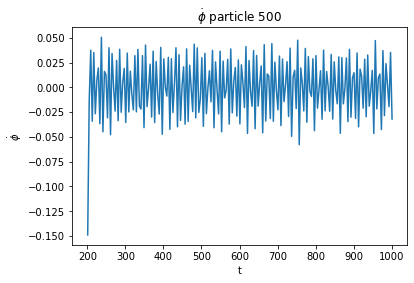

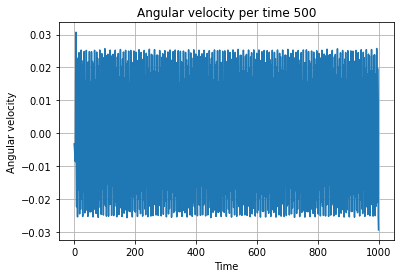

In [25]:
[NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
NP=int(NP)
samples=int(samples)
wall=int(wall)
fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)

print(calcVarphi2(fil, filf, DT, 0))
print(calcVarphiOnlyLastSample(fil, filf, DT, timestep=0))
plotVarphipertime(fil, filf, DT, timestep=0)
plotGraps2(fil, filf, DT, 100, plotVelAndPol=True, timestep=800)
plotMeanAngularVelPerTime(fil, filf, DT,  50)
plotPolarizationOrder(fil)
plotGraps2(fil, filf, DT, 107, plotVelAndPol=False, timestep=800)
plotGraps2(fil, filf, DT, 500, plotVelAndPol=False, timestep=800)

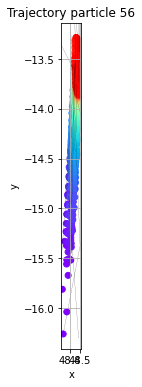

In [166]:
plotTraj2(56, fil)